# Importar Librerías y datos

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
import itertools

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


In [4]:
df = pd.read_parquet("output_08.parquet") #dataset con columnas innecesarias eliminadas

In [5]:
df.head()

,age,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,gender_1.0,...,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged,income_above_limit_1.0
0,0.853333,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.00292,True,...,False,True,False,True,False,False,False,False,False,False
1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,True,...,True,True,False,True,False,False,True,False,True,False
2,0.080000,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.00000,False,...,True,True,False,True,False,False,True,False,True,False
4,0.733333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,False,...,False,True,False,True,False,False,False,False,False,False
5,0.400000,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.00000,False,...,False,False,False,False,False,False,True,False,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159814 entries, 0 to 209498
Data columns (total 46 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   age                                                  159814 non-null  float64
 1   employment_stat                                      159814 non-null  float64
 2   wage_per_hour                                        159814 non-null  float64
 3   working_week_per_year                                159814 non-null  float64
 4   occupation_code                                      159814 non-null  float64
 5   total_employed                                       159814 non-null  float64
 6   gains                                                159814 non-null  float64
 7   losses                                               159814 non-null  float64
 8   stocks_status                                        159814

In [7]:
df.columns

Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'occupation_code', 'total_employed', 'gains', 'losses', 'stocks_status',
       'gender_1.0', 'education_secondary_complete',
       'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat_Other', 'househol

In [8]:
df.shape

(159814, 46)

# Modelo de machine learning- árboles de decisión

In [10]:
#Probabilidad de ganar mas o menos de 50.000€ al año utilizando la variable income_above_limit

## **1.Separar variables predictoras y objetivo**

In [12]:
# Separar variables predictoras y objetivo
X = df.drop(columns=['income_above_limit_1.0'], errors='ignore')
y = df['income_above_limit_1.0']



## **2.Dividir en conjunto de entrenamiento (80%) y prueba (20%)**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ## **3.Entrenar modelo de Árbol de Decisión**

In [16]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report_dict).transpose()
df_report.loc['accuracy'] = [accuracy, '', '', '']

print(df_report)


              precision    recall  f1-score  support
False          0.954359  0.947186  0.950759  29405.0
True           0.441166  0.479281  0.459434   2558.0
accuracy       0.909739                             
macro avg      0.697762  0.713233  0.705096  31963.0
weighted avg   0.913288  0.909739  0.911438  31963.0


C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\4179262336.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accuracy'] = [accuracy, '', '', '']
C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\4179262336.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accuracy'] = [accuracy, '', '', '']
C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\4179262336.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accuracy'] = 

 ## **4.Conclusiones modelo- Árbol de decisión**

# **Definición de clases**
- **False** → Representa **ingresos por debajo del límite (bajos)**.
- **True** → Representa **ingresos por encima del límite (altos)**.

---

## **1. Precisión (Precision)**
Indica cuántas de las predicciones positivas (**True**, es decir, ingresos por encima del límite) realizadas por el modelo son realmente correctas.

- **Para False (ingresos bajos):** **95.43%** → Cuando el modelo predice ingresos bajos, es correcto el 95.43% de las veces.
- **Para True (ingresos altos):** **44.11%** → Cuando el modelo predice ingresos altos, solo es correcto en el 44.11% de los casos.

---

## **2. Exhaustividad (Recall)**
Mide cuántos de los casos realmente positivos (**True**, ingresos altos) fueron identificados correctamente por el modelo.

- **Para False (ingresos bajos):** **94.71%** → El modelo reconoce correctamente la mayoría de los ingresos bajos.
- **Para True (ingresos altos):** **47.92%** → El modelo solo identifica correctamente el 47.92% de los ingresos altos, lo que significa que está dejando muchos sin identificar.

---

## **3. Puntuación F1 (F1-score)**
Es una métrica que equilibra la precisión y el recall en un solo valor.

- **Para False:** **95.07%** → Muy bueno para ingresos bajos.
- **Para True:** **45.94%** → Muy bajo, indicando que el modelo tiene dificultades con los ingresos altos.

---

## **4. Accuracy**
Indica qué porcentaje de todas las predicciones (tanto de ingresos altos como bajos) fueron correctas.

- **90.97%**, aunque parece alto, este valor puede ser engañoso si hay un desbalance de clases.

---

## **5. Support *(No es una métrica de rendimiento)***
Es simplemente el número de instancias reales de cada clase en el conjunto de datos de prueba.

- **Había 29,405 ejemplos reales de ingresos bajos (False) en el conjunto de prueba.**
- **Había 2,558 ejemplos reales de ingresos altos (True) en el conjunto de prueba.**

---

## **Conclusiones con esta nueva definición**
✅ **El modelo es muy bueno prediciendo ingresos bajos, pero tiene dificultades para predecir ingresos altos.**  
⚠️ **Casi la mitad de los ingresos altos (True) no son reconocidos correctamente, ya que el recall es solo del 47.92%.**  
📉 **Esto indica un problema de desbalance de clases, donde la clase False (ingresos bajos) domina el conjunto de datos.**  
⚖️ **El modelo tiende a predecir "ingresos bajos" en exceso, lo que reduce la precisión en True (ingresos altos).**  

🚀 **Para mejorar el modelo, se pueden probar técnicas de balanceo de clases y ajuste de hiperparámetros.**


# Modelo de machine learning-Random Forest

## **1.Separar variables predictoras y objetivo**

In [21]:
X = df.drop(columns=['income_above_limit_1.0'], errors='ignore')
y = df['income_above_limit_1.0']


## **2.Dividir en conjunto de entrenamiento (80%) y prueba (20%)**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ## **3.Entrenar modelo de Random Forest**

C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\2626967912.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accuracy'] = [accuracy_rf, '', '', '']
C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\2626967912.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accuracy'] = [accuracy_rf, '', '', '']
C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\2626967912.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_report.loc['accurac

              precision    recall  f1-score  support
False          0.951725  0.982214  0.966729  29405.0
True           0.676361  0.427287  0.523718   2558.0
accuracy       0.937803                             
macro avg      0.814043   0.70475  0.745224  31963.0
weighted avg   0.929688  0.937803  0.931275  31963.0


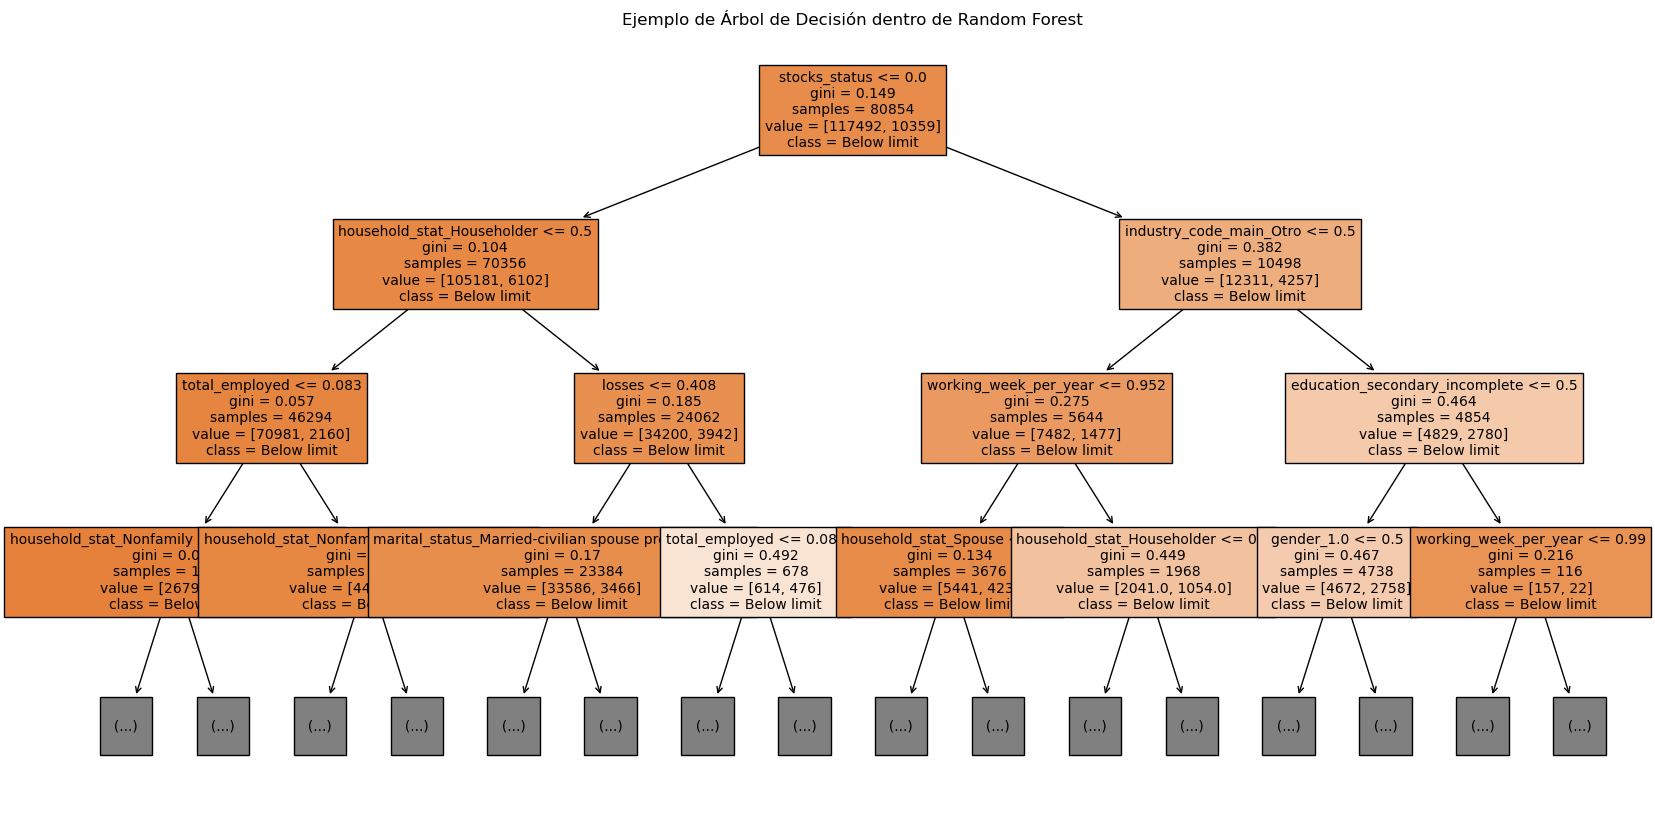

In [25]:
# Entrenar modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)

df_report = pd.DataFrame(report_rf_dict).transpose()
df_report.loc['accuracy'] = [accuracy_rf, '', '', '']

print(df_report)

# Graficar un árbol de decisión dentro del Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, class_names=["Below limit", "Above limit"], filled=True, max_depth=3, fontsize=10)
plt.title("Ejemplo de Árbol de Decisión dentro de Random Forest")
plt.show()


## **4.Conclusiones modelo- Random Forest**



## **Definición de clases**
- **False** → Representa **ingresos por debajo del límite (bajos)**.
- **True** → Representa **ingresos por encima del límite (altos)**.

---

## **1. Precisión (Precision)**
Indica cuántas de las predicciones positivas (**True**, es decir, ingresos por encima del límite) realizadas por el modelo son realmente correctas.

- **Para False (ingresos bajos):** **95.17%** → Cuando el modelo predice ingresos bajos, es correcto el 95.17% de las veces.
- **Para True (ingresos altos):** **67.63%** → Cuando el modelo predice ingresos altos, solo es correcto en el 67.63% de los casos.

---

## **2. Exhaustividad (Recall)**
Mide cuántos de los casos realmente positivos (**True**, ingresos altos) fueron identificados correctamente por el modelo.

- **Para False (ingresos bajos):** **98.22%** → El modelo reconoce correctamente la mayoría de los ingresos bajos.
- **Para True (ingresos altos):** **42.72%** → El modelo solo identifica correctamente el 42.72% de los ingresos altos, lo que significa que está dejando muchos sin identificar.

---

## **3. Puntuación F1 (F1-score)**
Es una métrica que equilibra la precisión y el recall en un solo valor.

- **Para False:** **96.67%** → Muy bueno para ingresos bajos.
- **Para True:** **52.37%** → Bajo, indicando que el modelo tiene dificultades con los ingresos altos.

---

## **4. Accuracy**
Indica qué porcentaje de todas las predicciones (tanto de ingresos altos como bajos) fueron correctas.

- **93.78%**, aunque parece alto, este valor puede ser engañoso si hay un desbalance de clases.

---

## **5. Support *(No es una métrica de rendimiento)***
Es simplemente el número de instancias reales de cada clase en el conjunto de datos de prueba.

- **Había 29,405 ejemplos reales de ingresos bajos (False) en el conjunto de prueba.**
- **Había 2,558 ejemplos reales de ingresos altos (True) en el conjunto de prueba.**

---

## **Conclusiones con esta nueva definición**
✅ **El modelo Random Forest es muy bueno prediciendo ingresos bajos, pero sigue teniendo dificultades para predecir ingresos altos.**  
⚠️ **El recall de la clase `True` (42.72%) es bajo, lo que significa que muchos ingresos altos no son reconocidos correctamente.**  
📉 **Esto indica un problema de desbalance de clases, donde la clase `False` (ingresos bajos) domina el conjunto de datos.**  
⚖️ **El modelo tiende a predecir "ingresos bajos" en exceso, aunque mejora la precisión en `True` comparado con modelos más simples.**  



# Conclusiones gráfico - Random Forest


## **Factores Clave en la Clasificación de Ingresos**
- **Las inversiones en acciones (`stocks_status`) y el sector industrial (`industry_code_main`)** son los principales determinantes del nivel de ingresos.
- **El número de semanas trabajadas (`working_week_per_year`) y el estado civil (`marital_status_Married-civilian spouse`)** tienen un impacto significativo en la clasificación de ingresos.
- **Las personas con educación secundaria incompleta (`education_secondary_incomplete`)** tienen una alta probabilidad de estar por debajo del límite de ingresos.
- **Trabajar en empresas pequeñas (`total_employed ≤ 0.083`)** se asocia con ingresos más bajos.

---

## **Interpretación de los Colores en el Gráfico**
- **🟠 Naranjas / Marrones** → Representan la clase **"Below limit"** (Ingresos por debajo del límite).
- **➡️ En este gráfico, todos los nodos son mayormente naranjas**, lo que indica que **el modelo clasifica predominantemente ingresos bajos**.

# Comparación de Árbol de decisión con Random Forest

## **📌 Métricas Comparadas**
| **Métrica**  | **Árbol de Decisión** | **Random Forest** | **Mejor Modelo** |
|-------------|---------------------|------------------|----------------|
| **Accuracy (Precisión Global)** | **90.97%** | **93.78%** | ✅ **Random Forest** |
| **Precisión (Clase False - Ingresos Bajos)** | 95.43% | **95.17%** | 🤝 **Similares** |
| **Precisión (Clase True - Ingresos Altos)** | 44.11% | **67.63%** | ✅ **Random Forest** |
| **Recall (Clase False - Ingresos Bajos)** | 94.71% | **98.22%** | ✅ **Random Forest** |
| **Recall (Clase True - Ingresos Altos)** | **47.92%** | 42.72% | 🔻 **Árbol de Decisión** |
| **F1-score (Clase False - Ingresos Bajos)** | 95.07% | **96.67%** | ✅ **Random Forest** |
| **F1-score (Clase True - Ingresos Altos)** | 45.94% | **52.37%** | ✅ **Random Forest** |
| **Macro Avg (Promedio General de Clases)** | 70.47% | **74.52%** | ✅ **Random Forest** |
| **Weighted Avg (Promedio Ponderado)** | 91.14% | **93.12%** | ✅ **Random Forest** |



✅ **Random Forest es superior en general**, ya que mejora la precisión de ingresos altos (`True`) sin comprometer demasiado el recall.  
⚠️ **Si el objetivo es detectar la mayor cantidad posible de ingresos altos (`True`), el Árbol de Decisión podría ser útil** debido a su recall más alto en esa clase.  



# Matriz de confusión - Árbol de decisión y Random Forest

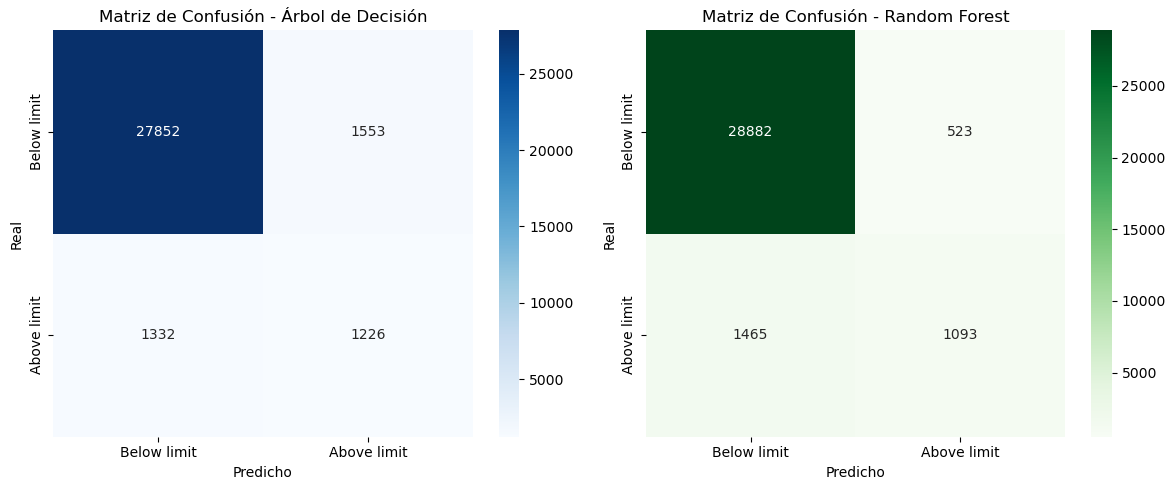

In [34]:
# Crear matrices de confusión
cm_dt = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Configurar gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de matriz de confusión - Árbol de Decisión
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Below limit", "Above limit"],
            yticklabels=["Below limit", "Above limit"], ax=axes[0])
axes[0].set_title("Matriz de Confusión - Árbol de Decisión")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

# Gráfico de matriz de confusión - Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Below limit", "Above limit"],
            yticklabels=["Below limit", "Above limit"], ax=axes[1])
axes[1].set_title("Matriz de Confusión - Random Forest")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

# Mostrar gráficos
plt.tight_layout()
plt.show()

# Conclusiones matriz de confusión



## **Interpretación de la Matriz de Confusión**
| **Modelo** | **Verdaderos Positivos (TP)** | **Falsos Negativos (FN)** | **Falsos Positivos (FP)** | **Verdaderos Negativos (TN)** |
|------------|-----------------------------|---------------------------|---------------------------|-----------------------------|
| **Árbol de Decisión** | **1226** (Altos bien clasificados) | **1332** (Altos mal clasificados como bajos) | **1553** (Bajos mal clasificados como altos) | **27852** (Bajos bien clasificados) |
| **Random Forest** | **1093** (Altos bien clasificados) | **1465** (Altos mal clasificados como bajos) | **523** (Bajos mal clasificados como altos) | **28882** (Bajos bien clasificados) |

---

## **📈 Comparación de Modelos**
### **1. Precisión en Ingresos Bajos (`Below limit`)**
- **Random Forest tiene menos falsos positivos (523) que el Árbol de Decisión (1553)**, lo que significa que **predice con mayor precisión los ingresos bajos**.
- **El Árbol de Decisión tiene más falsos positivos**, lo que sugiere que clasifica erróneamente más ingresos bajos como altos.

📌 **Conclusión:** **Random Forest es mejor para predecir ingresos bajos**.

---

### **2. Recall en Ingresos Altos (`Above limit`)**
- **Árbol de Decisión** clasifica correctamente **1226 ingresos altos** y falla en **1332 casos**.
- **Random Forest** clasifica correctamente **1093 ingresos altos** y falla en **1465 casos**.

📌 **Conclusión:** **El Árbol de Decisión detecta más ingresos altos que Random Forest, aunque con más falsos positivos**.

---

### **3. Balance entre Precisión y Recall**
- **Random Forest tiene menos falsos positivos**, lo que lo hace más **preciso** en la predicción de ingresos bajos.
- **El Árbol de Decisión tiene mejor recall en ingresos altos**, lo que significa que **detecta más ingresos altos, aunque con menor precisión**.

📌 **Conclusión:**  
- **Si el objetivo es detectar con precisión ingresos bajos, Random Forest es la mejor opción**.  
- **Si el objetivo es detectar la mayor cantidad posible de ingresos altos, el Árbol de Decisión es mejor**.

---

## **📌 Conclusión General**
✅ **Random Forest es mejor para evitar falsos positivos y clasificar correctamente ingresos bajos.**  
⚠️ **El Árbol de Decisión es mejor para capturar ingresos altos, aunque con menor precisión.**  
💡 **Si el objetivo es encontrar la mayor cantidad de ingresos altos sin importar algunos errores, el Árbol de Decisión es una mejor opción.**  
📉 **Si queremos minimizar errores y asegurar clasificaciones más precisas en general, Random Forest es la mejor opción.**  


# Importancia de las características respecto a la variable a predecir

C:\Users\rossj\AppData\Local\Temp\ipykernel_45560\1361370859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


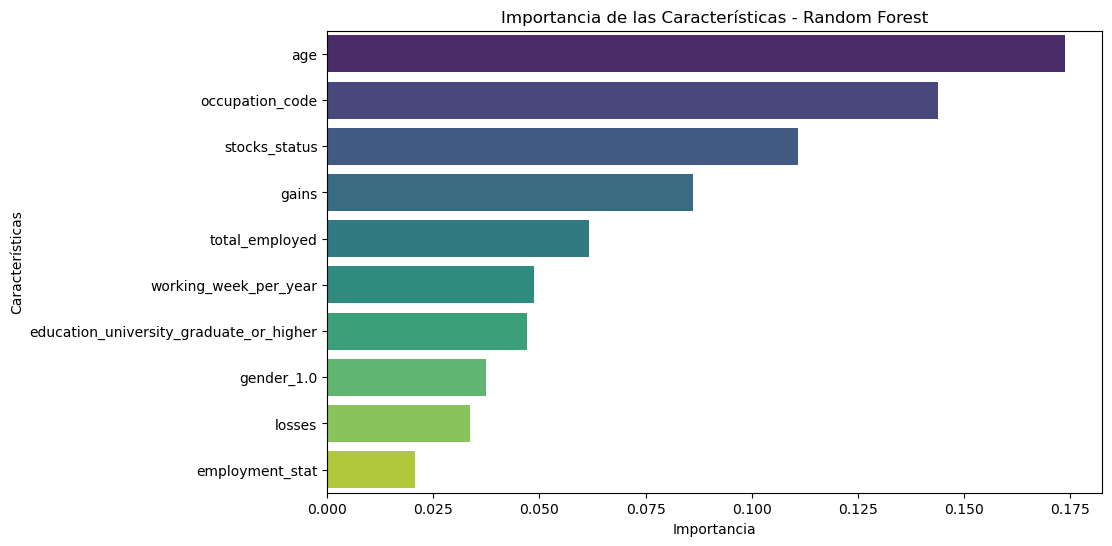

In [38]:
#Importancia de las características respecto a la variable a predecir
# Obtener la importancia de las características del modelo Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(10)  # Seleccionar las 10 más importantes

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características - Random Forest")
plt.show()


# Conclusiones de la importancia de variables


✅ **La edad y la ocupación** son los factores más influyentes en los ingresos.  
✅ **Tener inversiones en acciones y educación universitaria** aumentan significativamente la probabilidad de tener ingresos altos.  
✅ **Las semanas trabajadas por año y el estado del empleo** afectan directamente el nivel de ingresos.  
✅ **Factores económicos como ganancias y pérdidas** también juegan un papel importante en la clasificación de ingresos.  
⚠️ **El género aparece como una variable relevante**, lo que podría indicar diferencias en ingresos según el género en los datos.  
